# Appendix - Python Code and Outputs

### Data Preparation

In [9]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Import Extracted Training Data

In [10]:
import numpy as np
import pandas as pd
# load training data
disaster_training_data = pd.read_csv('train.csv')

# show first rows of the data
disaster_training_data.head(10)

# show number of columns and rows
disaster_training_data.shape

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


(7613, 5)

In [11]:
# drop id column from training data
disaster_training_data.drop(columns = 'id', inplace=True)

# show first ten rows
disaster_training_data.head(10)

,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,NaN,NaN,There's an emergency evacuation happening now ...,1
9,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


### Investigation of Missing Data and Outliers in Training Data

In [12]:
# find null counts, percentage of null values, and column type
null_count = disaster_training_data.isnull().sum()
null_percentage = disaster_training_data.isnull().sum() * 100 / len(disaster_training_data)
column_type = disaster_training_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type
location,2533,33.272035,object
keyword,61,0.801261,object


The above analysis displays that location is missing from 2533 rows and keyword is missing from 61 rows in the training data.

In [13]:
# deal with missing values

# fill missing keyword with unknown
disaster_training_data['keyword'].fillna('unknown', inplace=True)

# fill missing keyword with unknown
disaster_training_data['location'].fillna('unknown', inplace=True)

# add keyword and location to tweets
disaster_training_data['text'] = disaster_training_data['text'] + ' ' + disaster_training_data['keyword']+ ' ' + disaster_training_data['location']

# find null counts, percentage of null values, and column type
null_count = disaster_training_data.isnull().sum()
null_percentage = disaster_training_data.isnull().sum() * 100 / len(disaster_training_data)
column_type = disaster_training_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type


### Import Testing Data

In [14]:
# import test dataset
disaster_testing_data = pd.read_csv('test.csv')

# show first ten rows of the data
disaster_testing_data.head(10)

# show number of columns and rows
disaster_testing_data.shape

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


(3263, 4)

### Investigation of Missing Data and Outliers in Testing Data

In [15]:
# find null counts, percentage of null values, and column type
null_count = disaster_testing_data.isnull().sum()
null_percentage = disaster_testing_data.isnull().sum() * 100 / len(disaster_testing_data)
column_type = disaster_testing_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type
location,1105,33.864542,object
keyword,26,0.796813,object


The above analysis displays that location is missing from 1105 rows and keyword is missing from 26 rows in the testing data.

In [16]:
# deal with missing values

# fill missing keyword with unknown
disaster_testing_data['keyword'].fillna('unknown', inplace=True)

# fill missing keyword with unknown
disaster_testing_data['location'].fillna('unknown', inplace=True)

# add keyword and location to tweets
disaster_testing_data['text'] = disaster_testing_data['text'] + ' ' + disaster_testing_data['keyword']+ ' ' + disaster_testing_data['location']

# find null counts, percentage of null values, and column type
null_count = disaster_testing_data.isnull().sum()
null_percentage = disaster_testing_data.isnull().sum() * 100 / len(disaster_training_data)
column_type = disaster_testing_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type


### Plot target counts

[Text(0.5, 1.0, 'Target Groups')]

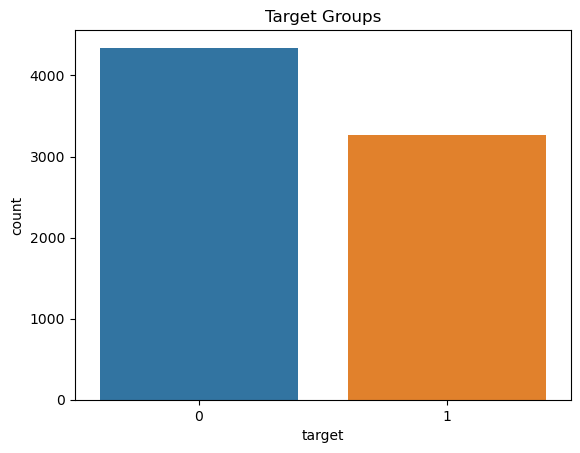

In [17]:
import seaborn as sns
import plotly as plt
sns.countplot(x='target', data=disaster_training_data).set(title = 'Target Groups')

In [18]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Embedding, GRU, Bidirectional, GlobalMaxPooling1D, Reshape
from tensorflow.keras.callbacks import ModelCheckpoint

In [19]:
# extract tweet label
tweet_label = disaster_training_data['target']

# convert to numpy array
tweet_label = np.array(tweet_label)
tweet_label = tweet_label.reshape(-1)

# extract tweet text
tweet_text = disaster_training_data['text']

# convert to numpy array
tweet_text = np.array(tweet_text)
print(tweet_text[1])

# reshape tweet text to rank 1 for TextVectorization
tweet_text = tf.reshape(tweet_text, (-1, 1))

# encode text using TextVecorization
text_vec_layer = tf.keras.layers.TextVectorization(split="character",
                                                   standardize="lower")
text_vec_layer.adapt([tweet_text])
encoded = text_vec_layer([tweet_text])[0]

Forest fire near La Ronge Sask. Canada unknown unknown


In [20]:
# number of distinct characters
n_tokens = text_vec_layer.vocabulary_size() - 2
print(n_tokens)

# drop tokens 0 (pad) and 1 (unknown)
encoded -= 2

# total number of chars
dataset_size = len(encoded) 
print(dataset_size)

106
7613


In [21]:
from sklearn.model_selection import train_test_split
# extract tweet label
tweet_text = disaster_training_data['text']

# convert to numpy array
tweet_text = np.array(tweet_text)
tweet_text = tweet_text.reshape(-1)

# extract tweet text
X_train, X_valid, y_train, y_valid = train_test_split(tweet_text, tweet_label, test_size=0.2, random_state=10)

In [14]:
# Build Initial Sequential Model
model = Sequential()
# 2D convolutional layer w/64 filters, 5x5 kernel, and ReLU activation function. Model expects 150x150 image with 3 channels.
model.add(Embedding(input_dim=n_tokens, output_dim=100, input_length=100))

# max pooling layer
model.add(GRU(units=128, return_sequences=True))

model.add(GlobalMaxPooling1D())

# We add a dense hidden layer:
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.5))

# # project onto a single unit output layer, and use sigmoid activation func
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          10600     
                                                                 
 gru (GRU)                   (None, 100, 128)          88320     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                        

2023-05-24 21:36:59.958603: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-24 21:36:59.960857: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-24 21:36:59.962440: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [ ]:
# Adam solver optimizer with learning rate of 0.001
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)

# compile model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# 
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("NLP_model", monitor="val_accuracy", save_best_only=True)

# fit the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, callbacks=[model_checkpoint], batch_size=32)

^ COMMENT: We should evaluate an F score in lieu of accuracy for these type of analysis.

### Model 2:
    Manny's section

#### Preprocessing

In [70]:
# Create a copy of the training dataframe
model2_train_df = disaster_training_data.copy(deep=True)

# Drop the LOCATION column from the copy of the training dataframe
model2_train_df.drop(['location'], axis=1, inplace=True)

# Create a copy of the testing dataframe
model2_test_df = disaster_testing_data.copy(deep=True)

# Drop the LOCATION column from the copy of the testing dataframe
model2_test_df.drop(['location'], axis=1, inplace=True)

Given that the location column has about a third of missing data, the location column was dropped. 

In [71]:
model2_train_df.head(10)

model2_test_df.head(10)

,keyword,text,target
0,unknown,Our Deeds are the Reason of this #earthquake M...,1
1,unknown,Forest fire near La Ronge Sask. Canada unknown...,1
2,unknown,All residents asked to 'shelter in place' are ...,1
3,unknown,"13,000 people receive #wildfires evacuation or...",1
4,unknown,Just got sent this photo from Ruby #Alaska as ...,1
5,unknown,#RockyFire Update => California Hwy. 20 closed...,1
6,unknown,#flood #disaster Heavy rain causes flash flood...,1
7,unknown,I'm on top of the hill and I can see a fire in...,1
8,unknown,There's an emergency evacuation happening now ...,1
9,unknown,I'm afraid that the tornado is coming to our a...,1


,id,keyword,text
0,0,unknown,Just happened a terrible car crash unknown unk...
1,2,unknown,"Heard about #earthquake is different cities, s..."
2,3,unknown,"there is a forest fire at spot pond, geese are..."
3,9,unknown,Apocalypse lighting. #Spokane #wildfires unkno...
4,11,unknown,Typhoon Soudelor kills 28 in China and Taiwan ...
5,12,unknown,We're shaking...It's an earthquake unknown unk...
6,21,unknown,They'd probably still show more life than Arse...
7,22,unknown,Hey! How are you? unknown unknown
8,27,unknown,What a nice hat? unknown unknown
9,29,unknown,Fuck off! unknown unknown


In [72]:
# fill missing keyword with unknown
model2_train_df['keyword'].fillna('unknown', inplace=True)

# add keyword and location to tweets
#disaster_training_data['text'] = disaster_training_data['text'] + ' ' + disaster_training_data['keyword']+ ' ' + disaster_training_data['location']

# find null counts, percentage of null values, and column type
null_count = model2_train_df.isnull().sum()
null_percentage = model2_train_df.isnull().sum() * 100 / len(model2_train_df)
column_type = model2_train_df.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type


In [73]:
# fill missing keyword with unknown
model2_test_df['keyword'].fillna('unknown', inplace=True)

# add keyword and location to tweets
#disaster_training_data['text'] = disaster_training_data['text'] + ' ' + disaster_training_data['keyword']+ ' ' + disaster_training_data['location']

# find null counts, percentage of null values, and column type
null_count = model2_test_df.isnull().sum()
null_percentage = model2_test_df.isnull().sum() * 100 / len(model2_test_df)
column_type = model2_test_df.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type


<Figure size 500x400 with 0 Axes>

C:\Users\mhurt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

Text(0.5, 0.98, 'Tweet word count histogram')

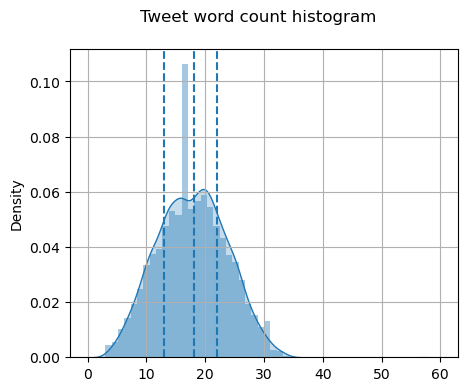

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
model2_train_df['Tweet_word_count'] = model2_train_df['text'].apply(lambda x: len(x.split(" ")) )
sns.distplot(model2_train_df['Tweet_word_count'].values, hist=True, kde=True, kde_kws={"shade": True})
plt.axvline(model2_train_df['Tweet_word_count'].describe()['25%'], ls="--")
plt.axvline(model2_train_df['Tweet_word_count'].describe()['50%'], ls="--")
plt.axvline(model2_train_df['Tweet_word_count'].describe()['75%'], ls="--")

plt.grid()
plt.suptitle("Tweet word count histogram")
plt.show()

In [79]:
# remove rows with under 3 words
#model2_train_df = model2_train_df[model2_train_df['Tweet_word_count']>2]
#model2_train_df = model2_train_df.reset_index()

# remove rows with more than 30 words
model2_train_df = model2_train_df[model2_train_df['Tweet_word_count']<30]
#model2_train_df = model2_train_df.reset_index()

AttributeError: 'list' object has no attribute 'reset_index'

<Figure size 500x400 with 0 Axes>

C:\Users\mhurt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

Text(0.5, 0.98, 'Tweet word count histogram')

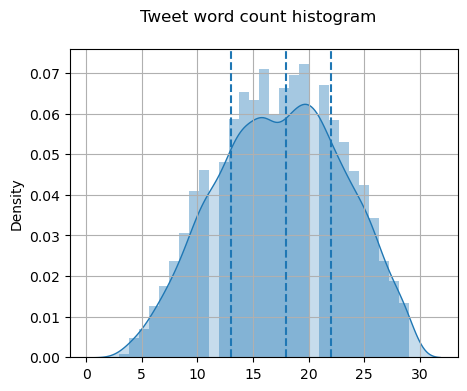

In [76]:
#Recheck frequency plot
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
#model2_train_df['Tweet_word_count'] = model2_train_df['text'].apply(lambda x: len(x.split(" ")) )
sns.distplot(model2_train_df['Tweet_word_count'].values, hist=True, kde=True, kde_kws={"shade": True})
plt.axvline(model2_train_df['Tweet_word_count'].describe()['25%'], ls="--")
plt.axvline(model2_train_df['Tweet_word_count'].describe()['50%'], ls="--")
plt.axvline(model2_train_df['Tweet_word_count'].describe()['75%'], ls="--")

plt.grid()
plt.suptitle("Tweet word count histogram")
plt.show()